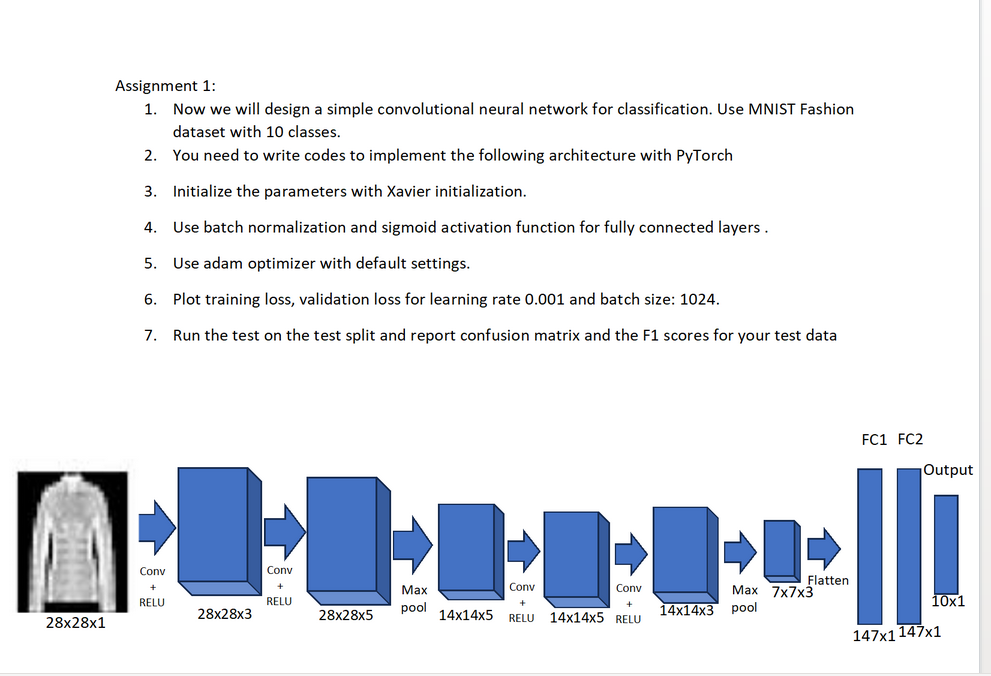

Using device: cuda


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.0MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 173kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.21MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.69MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch 1/20
----------


Train Loss: 1.4613, Train Acc: 60.11%
Val Loss: 0.9691, Val Acc: 72.05%
Validation loss improved, saving model ...
Epoch 2/20
----------


Train Loss: 0.7924, Train Acc: 76.83%
Val Loss: 0.6916, Val Acc: 78.07%
Validation loss improved, saving model ...
Epoch 3/20
----------


Train Loss: 0.6237, Train Acc: 80.38%
Val Loss: 0.5780, Val Acc: 81.35%
Validation loss improved, saving model ...
Epoch 4/20
----------


Train Loss: 0.5362, Train Acc: 82.74%
Val Loss: 0.5186, Val Acc: 83.03%
Validation loss improved, saving model ...
Epoch 5/20
----------


Train Loss: 0.4824, Train Acc: 84.12%
Val Loss: 0.4695, Val Acc: 84.45%
Validation loss improved, saving model ...
Epoch 6/20
----------


Train Loss: 0.4459, Train Acc: 85.12%
Val Loss: 0.4435, Val Acc: 84.84%
Validation loss improved, saving model ...
Epoch 7/20
----------


Train Loss: 0.4195, Train Acc: 85.78%
Val Loss: 0.4257, Val Acc: 85.28%
Validation loss improved, saving model ...
Epoch 8/20
----------


Train Loss: 0.3996, Train Acc: 86.31%
Val Loss: 0.4067, Val Acc: 85.62%
Validation loss improved, saving model ...
Epoch 9/20
----------


Train Loss: 0.3835, Train Acc: 86.73%
Val Loss: 0.4029, Val Acc: 86.13%
Validation loss improved, saving model ...
Epoch 10/20
----------


Train Loss: 0.3707, Train Acc: 87.07%
Val Loss: 0.3792, Val Acc: 86.63%
Validation loss improved, saving model ...
Epoch 11/20
----------


Train Loss: 0.3598, Train Acc: 87.35%
Val Loss: 0.3761, Val Acc: 86.86%
Validation loss improved, saving model ...
Epoch 12/20
----------


Train Loss: 0.3511, Train Acc: 87.57%
Val Loss: 0.3712, Val Acc: 86.82%
Validation loss improved, saving model ...
Epoch 13/20
----------


Train Loss: 0.3440, Train Acc: 87.75%
Val Loss: 0.3618, Val Acc: 87.18%
Validation loss improved, saving model ...
Epoch 14/20
----------


Train Loss: 0.3381, Train Acc: 88.02%
Val Loss: 0.3582, Val Acc: 87.28%
Validation loss improved, saving model ...
Epoch 15/20
----------


Train Loss: 0.3327, Train Acc: 88.20%
Val Loss: 0.3528, Val Acc: 87.44%
Validation loss improved, saving model ...
Epoch 16/20
----------


Train Loss: 0.3273, Train Acc: 88.35%
Val Loss: 0.3531, Val Acc: 87.42%
EarlyStopping counter: 1 out of 5
Epoch 17/20
----------


Train Loss: 0.3224, Train Acc: 88.50%
Val Loss: 0.3431, Val Acc: 87.80%
Validation loss improved, saving model ...
Epoch 18/20
----------


Train Loss: 0.3180, Train Acc: 88.63%
Val Loss: 0.3418, Val Acc: 87.84%
Validation loss improved, saving model ...
Epoch 19/20
----------


Train Loss: 0.3140, Train Acc: 88.80%
Val Loss: 0.3389, Val Acc: 87.75%
Validation loss improved, saving model ...
Epoch 20/20
----------


<ipython-input-1-8df39236a4da>:272: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(early_stopping.path))


Train Loss: 0.3100, Train Acc: 88.89%
Val Loss: 0.3347, Val Acc: 87.97%
Validation loss improved, saving model ...


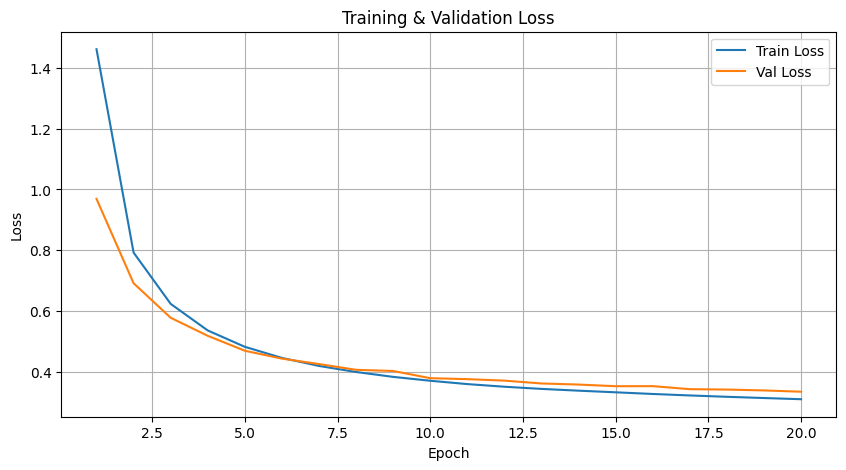

Test Accuracy: 87.38%
Test F1 Score: 0.8738


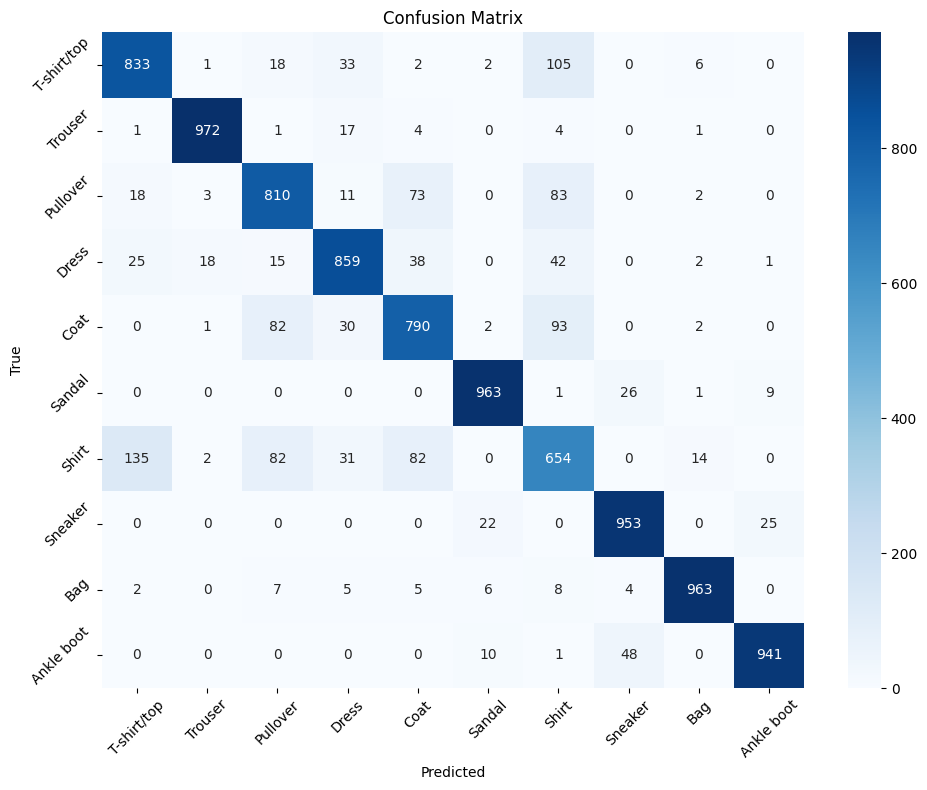

Model saved as fashion_cnn_modified.pth


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from tqdm import tqdm
import random

# ===========================
# Configuration and Settings
# ===========================
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

config = {
    'batch_size': 1024,
    'learning_rate': 0.001,
    'num_epochs': 20,
    'validation_split': 0.2,
    'seed': 42,
    'num_workers': 4,
    'patience': 5,
}

# ===========================
# Data Preparation
# ===========================
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_val_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)

test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)

train_size = int((1 - config['validation_split']) * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size
train_set, val_set = random_split(
    train_val_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(config['seed'])
)

val_set.dataset.transform = transform_test

train_loader = DataLoader(
    train_set,
    batch_size=config['batch_size'],
    shuffle=True,
    num_workers=config['num_workers'],
    pin_memory=True
)

val_loader = DataLoader(
    val_set,
    batch_size=config['batch_size'],
    shuffle=False,
    num_workers=config['num_workers'],
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=config['batch_size'],
    shuffle=False,
    num_workers=config['num_workers'],
    pin_memory=True
)

class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# ===========================
# Model Definition
# ===========================
class FashionCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(FashionCNN, self).__init__()

        # According to the given architecture:
        # Input: 28x28x1
        # Conv+ReLU: out_channels=3 -> 28x28x3
        # Conv+ReLU: out_channels=5 -> 28x28x5
        # MaxPool: -> 14x14x5
        # Conv+ReLU: out_channels=3 -> 14x14x3
        # MaxPool: -> 7x7x3

        self.features = nn.Sequential(
            nn.Conv2d(1, 3, kernel_size=3, padding=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True),

            nn.Conv2d(3, 5, kernel_size=3, padding=1),
            nn.BatchNorm2d(5),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(2, 2),  # 14x14x5

            nn.Conv2d(5, 3, kernel_size=3, padding=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(2, 2)  # 7x7x3
        )

        # Flatten: 7x7x3 = 147 features
        # FC1(147->147) + BatchNorm1d + Sigmoid
        # FC2(147->10) + BatchNorm1d + Sigmoid
        # Note: Usually for multi-class classification with CrossEntropyLoss, we do not apply
        # sigmoid on the final layer. The assignment states to use sigmoid activation in FC layers.
        # We'll apply sigmoid after FC1. For the output layer, we typically leave it without
        # activation as CrossEntropy expects logits.

        self.classifier = nn.Sequential(
            nn.Linear(147, 147),
            nn.BatchNorm1d(147),
            nn.Sigmoid(),
            nn.Linear(147, num_classes) # no activation here
        )

        self._initialize_weights()

    def _initialize_weights(self):
        # Xavier initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.classifier(x)
        return x

model = FashionCNN(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])

# ===========================
# Early Stopping
# ===========================
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0.0, path='checkpoint.pt'):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss improved, saving model ...')
        torch.save(model.state_dict(), self.path)

early_stopping = EarlyStopping(patience=config['patience'], verbose=True)

# ===========================
# Training and Validation
# ===========================
def train_validate(model, criterion, optimizer, num_epochs, train_loader, val_loader, device, early_stopping):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in tqdm(train_loader, desc='Training', leave=False):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(epoch_train_loss)

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc='Validation', leave=False):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        val_accuracy = 100 * correct_val / total_val
        val_losses.append(epoch_val_loss)

        print(f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%')
        print(f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

        # Early Stopping
        early_stopping(epoch_val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break

    # Load best model
    model.load_state_dict(torch.load(early_stopping.path))

    return {
        'train_losses': train_losses,
        'val_losses': val_losses
    }

history = train_validate(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=config['num_epochs'],
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    early_stopping=early_stopping
)

# ===========================
# Plot Training/Validation Loss
# ===========================
def plot_training_history(history):
    epochs = range(1, len(history['train_losses']) + 1)
    plt.figure(figsize=(10,5))
    plt.plot(epochs, history['train_losses'], label='Train Loss')
    plt.plot(epochs, history['val_losses'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_history(history)

# ===========================
# Evaluation on Test Data
# ===========================
def evaluate_model(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in tqdm(loader, desc='Testing', leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"Test Accuracy: {accuracy:.2f}%")
    print(f"Test F1 Score: {f1:.4f}")

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return accuracy, f1, cm

test_accuracy, test_f1, cm = evaluate_model(model, test_loader, device)

# Save the final model
torch.save(model.state_dict(), 'fashion_cnn_modified.pth')
print("Model saved as fashion_cnn_modified.pth")


Using device: cuda
Training set size: 48000
Validation set size: 12000
Test set size: 10000
Sample images from the training set:


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


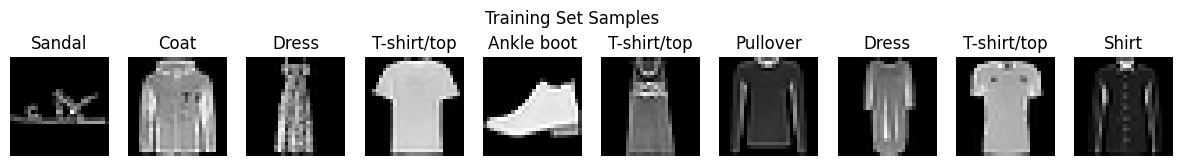

Class distribution in the training set:


<ipython-input-4-c367b3fff538>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='viridis')


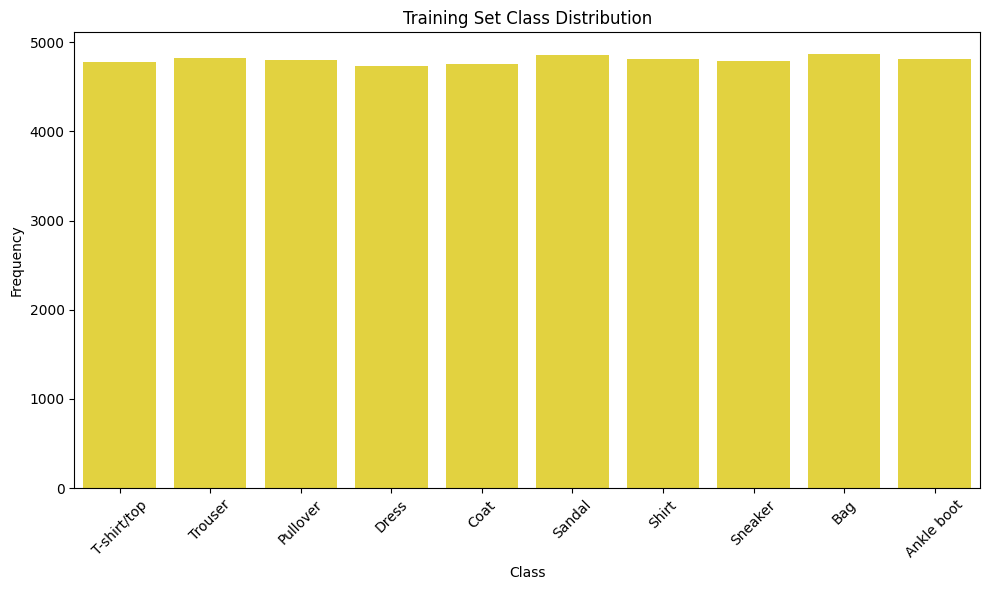

Class distribution in the validation set:


<ipython-input-4-c367b3fff538>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='viridis')


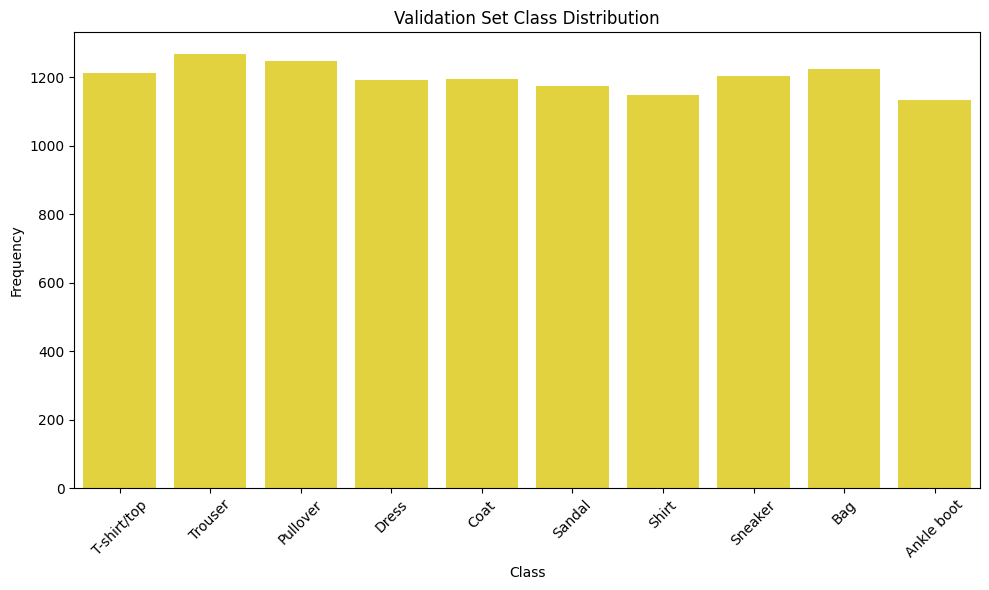

Class distribution in the test set:


<ipython-input-4-c367b3fff538>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='viridis')


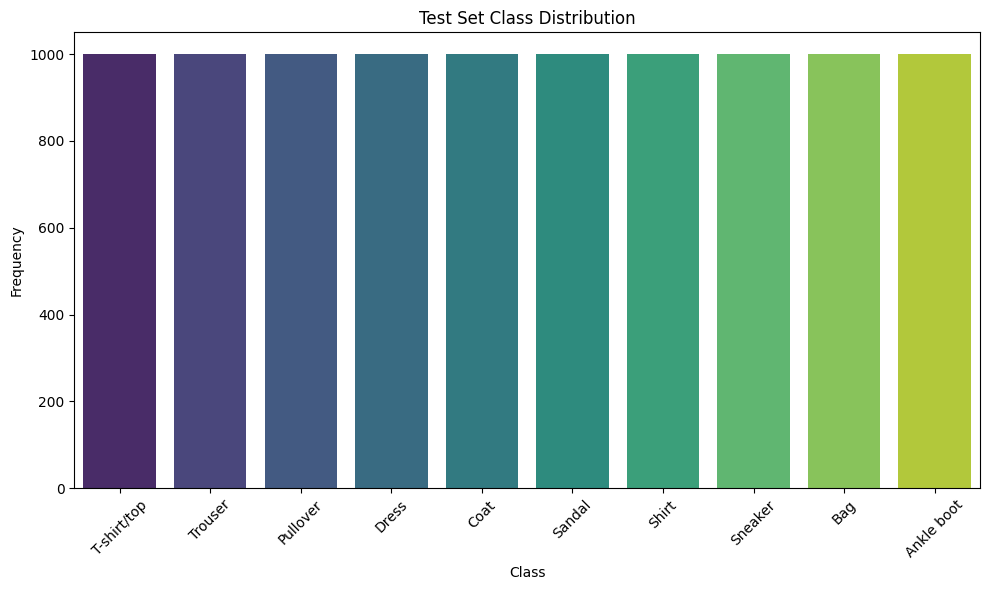

Inspecting a batch from the training loader:


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Image tensor shape: torch.Size([1024, 1, 28, 28])
Label tensor shape: torch.Size([1024])
Image pixel range (normalized): (-1.0, 1.0)
Mean pixel value (normalized): -0.4225
Std pixel value (normalized): 0.7112
Grid of sample images from the training set:


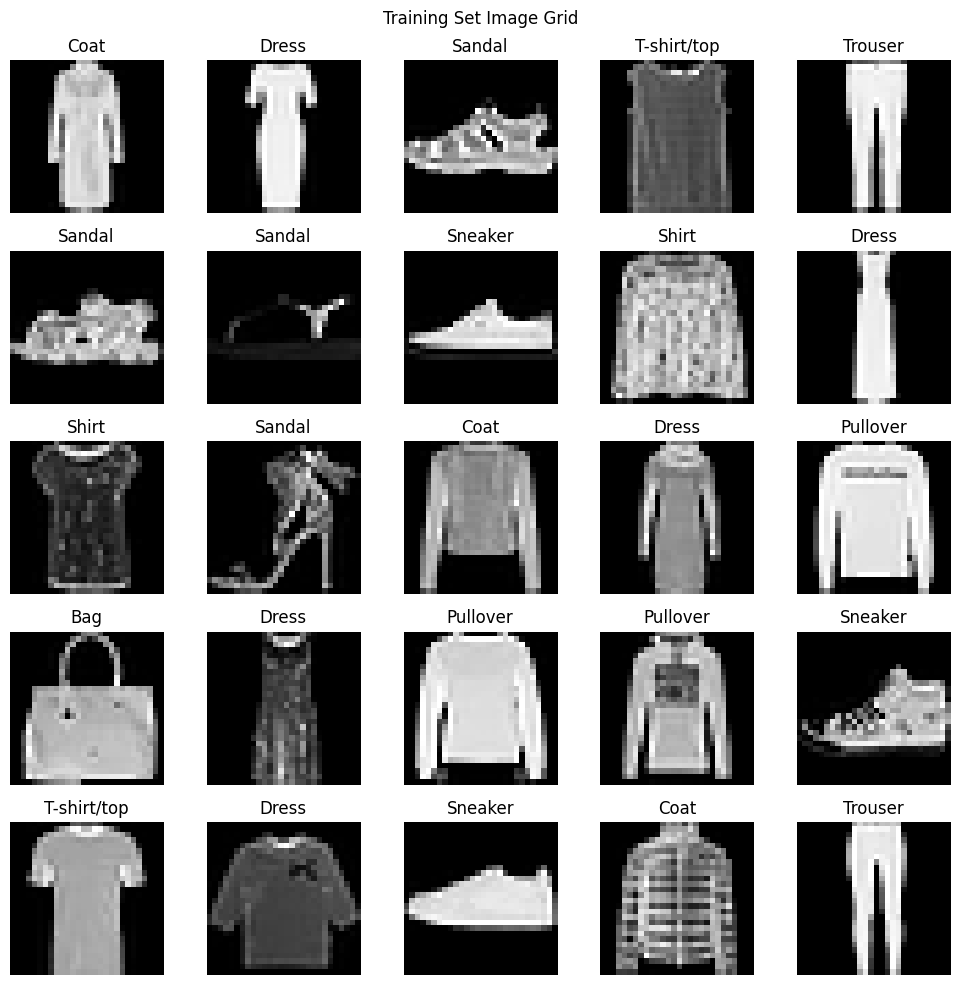

Validating normalization:
Unnormalized pixel range: (0.0, 1.0)
Computing average images per class in the training set:


Computing average images: 100%|██████████| 48000/48000 [00:12<00:00, 3974.60it/s]


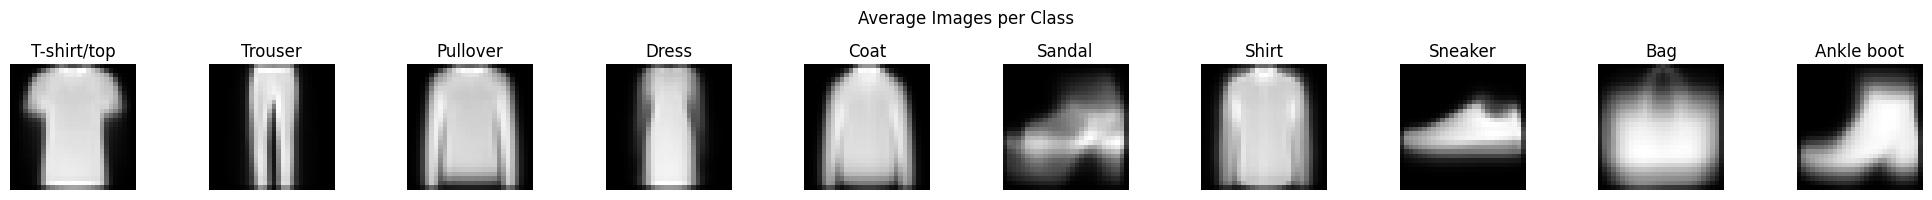

Computing variability images per class in the training set:


Computing class variability: 100%|██████████| 48000/48000 [00:13<00:00, 3644.95it/s]


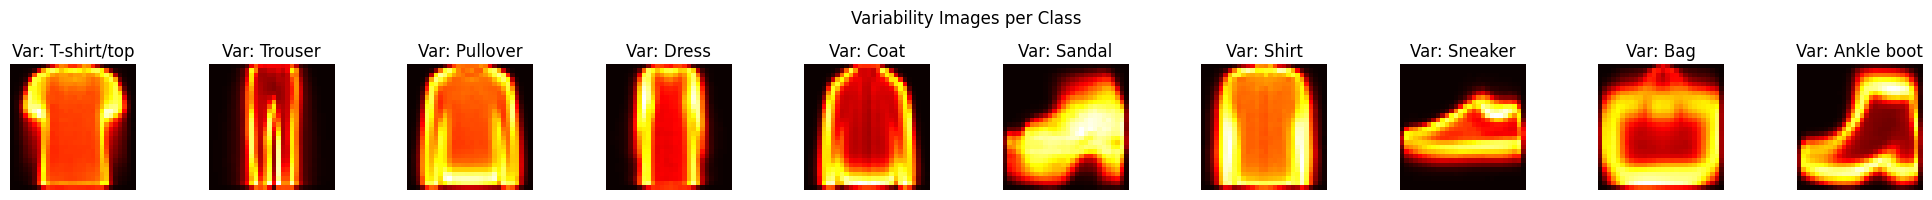

Epoch 1/20
----------


Training Loss: 0.9457, Training Accuracy: 67.63%
Validation Loss: 0.6226, Validation Accuracy: 78.91%, F1 Score: 0.7892
Validation loss decreased (0.622583 --> 0.622583).  Saving model ...
Epoch 2/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.5358, Training Accuracy: 81.11%
Validation Loss: 0.4117, Validation Accuracy: 85.34%, F1 Score: 0.8512
Validation loss decreased (0.411662 --> 0.411662).  Saving model ...
Epoch 3/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.4406, Training Accuracy: 84.73%
Validation Loss: 0.3489, Validation Accuracy: 87.34%, F1 Score: 0.8709
Validation loss decreased (0.348905 --> 0.348905).  Saving model ...
Epoch 4/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.3864, Training Accuracy: 86.53%
Validation Loss: 0.3239, Validation Accuracy: 88.06%, F1 Score: 0.8782
Validation loss decreased (0.323942 --> 0.323942).  Saving model ...
Epoch 5/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.3537, Training Accuracy: 87.59%
Validation Loss: 0.3103, Validation Accuracy: 88.71%, F1 Score: 0.8838
Validation loss decreased (0.310315 --> 0.310315).  Saving model ...
Epoch 6/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.3318, Training Accuracy: 88.42%
Validation Loss: 0.2836, Validation Accuracy: 89.53%, F1 Score: 0.8940
Validation loss decreased (0.283619 --> 0.283619).  Saving model ...
Epoch 7/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.3129, Training Accuracy: 88.97%
Validation Loss: 0.2500, Validation Accuracy: 90.97%, F1 Score: 0.9088
Validation loss decreased (0.249999 --> 0.249999).  Saving model ...
Epoch 8/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.2955, Training Accuracy: 89.55%
Validation Loss: 0.2468, Validation Accuracy: 91.04%, F1 Score: 0.9094
Validation loss decreased (0.246751 --> 0.246751).  Saving model ...
Epoch 9/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.2943, Training Accuracy: 89.60%
Validation Loss: 0.2490, Validation Accuracy: 91.01%, F1 Score: 0.9090
EarlyStopping counter: 1 out of 5
Epoch 10/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.2871, Training Accuracy: 89.90%
Validation Loss: 0.2464, Validation Accuracy: 91.07%, F1 Score: 0.9097
Validation loss decreased (0.246363 --> 0.246363).  Saving model ...
Epoch 11/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.2890, Training Accuracy: 89.89%
Validation Loss: 0.2460, Validation Accuracy: 91.12%, F1 Score: 0.9100
Validation loss decreased (0.245971 --> 0.245971).  Saving model ...
Epoch 12/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.2829, Training Accuracy: 90.13%
Validation Loss: 0.2426, Validation Accuracy: 91.28%, F1 Score: 0.9118
Validation loss decreased (0.242623 --> 0.242623).  Saving model ...
Epoch 13/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.2797, Training Accuracy: 90.14%
Validation Loss: 0.2406, Validation Accuracy: 91.38%, F1 Score: 0.9128
Validation loss decreased (0.240578 --> 0.240578).  Saving model ...
Epoch 14/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.2770, Training Accuracy: 90.26%
Validation Loss: 0.2365, Validation Accuracy: 91.47%, F1 Score: 0.9135
Validation loss decreased (0.236523 --> 0.236523).  Saving model ...
Epoch 15/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.2754, Training Accuracy: 90.22%
Validation Loss: 0.2378, Validation Accuracy: 91.48%, F1 Score: 0.9139
EarlyStopping counter: 1 out of 5
Epoch 16/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.2735, Training Accuracy: 90.32%
Validation Loss: 0.2378, Validation Accuracy: 91.47%, F1 Score: 0.9138
EarlyStopping counter: 2 out of 5
Epoch 17/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.2765, Training Accuracy: 90.25%
Validation Loss: 0.2372, Validation Accuracy: 91.47%, F1 Score: 0.9138
EarlyStopping counter: 3 out of 5
Epoch 18/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Training Loss: 0.2741, Training Accuracy: 90.50%
Validation Loss: 0.2384, Validation Accuracy: 91.42%, F1 Score: 0.9133
EarlyStopping counter: 4 out of 5
Epoch 19/20
----------


Training:   0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
<ipython-input-4-c367b3fff538>:463: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that

Training Loss: 0.2768, Training Accuracy: 90.28%
Validation Loss: 0.2378, Validation Accuracy: 91.48%, F1 Score: 0.9140
EarlyStopping counter: 5 out of 5
Early stopping triggered. Stopping training.


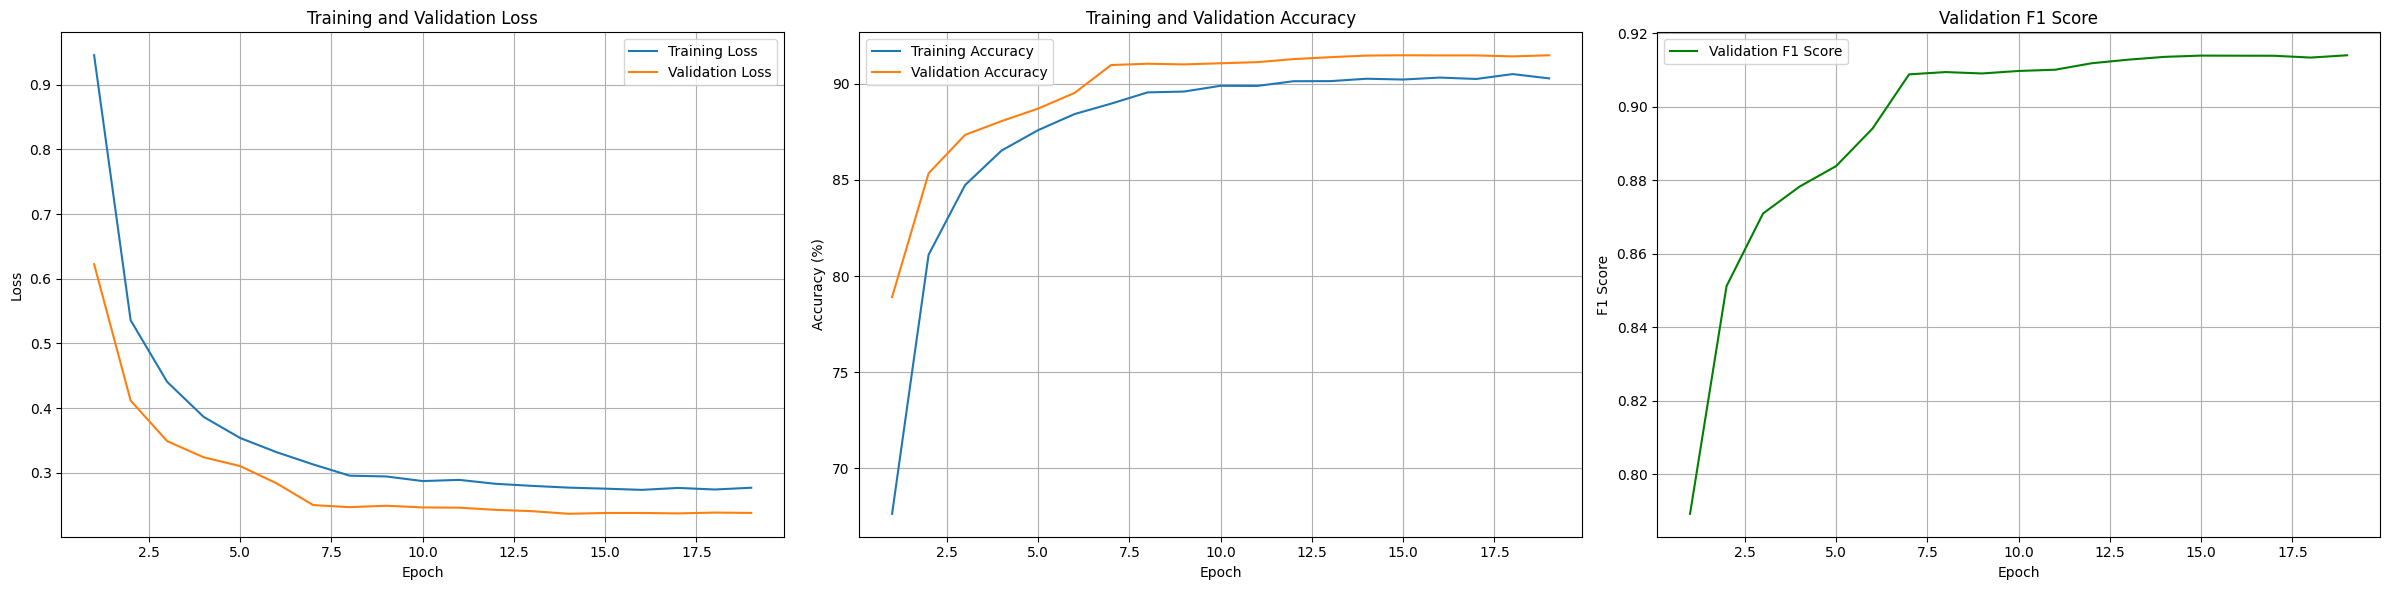

Testing:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Test Accuracy: 90.90%
Test F1 Score: 0.9078


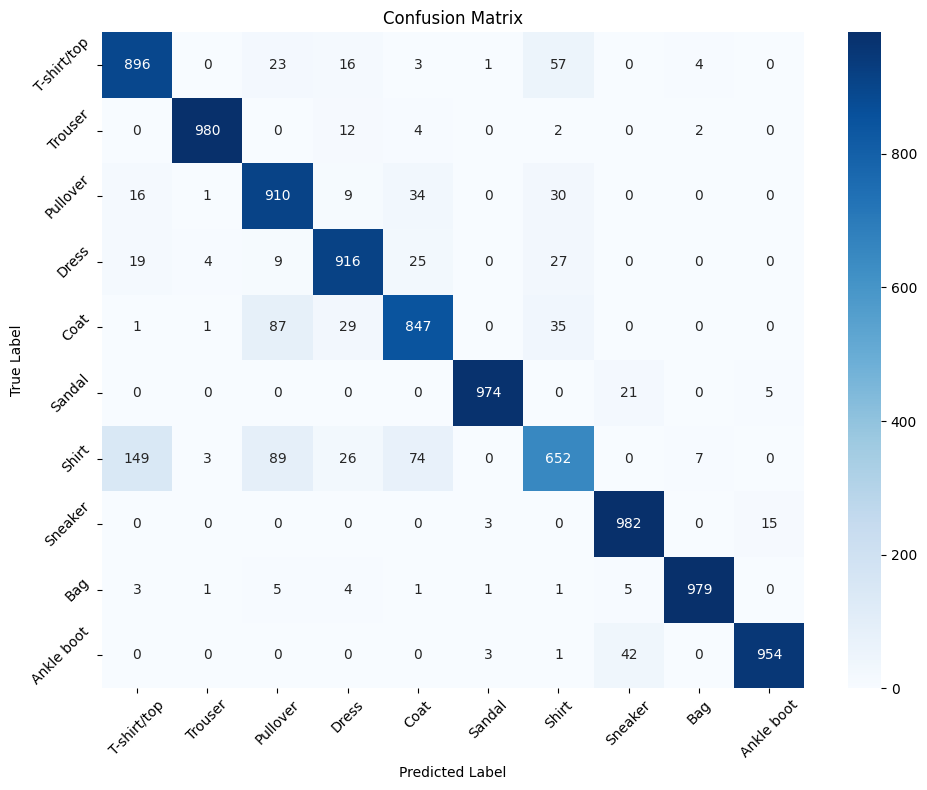

Model saved to fashion_cnn.pth


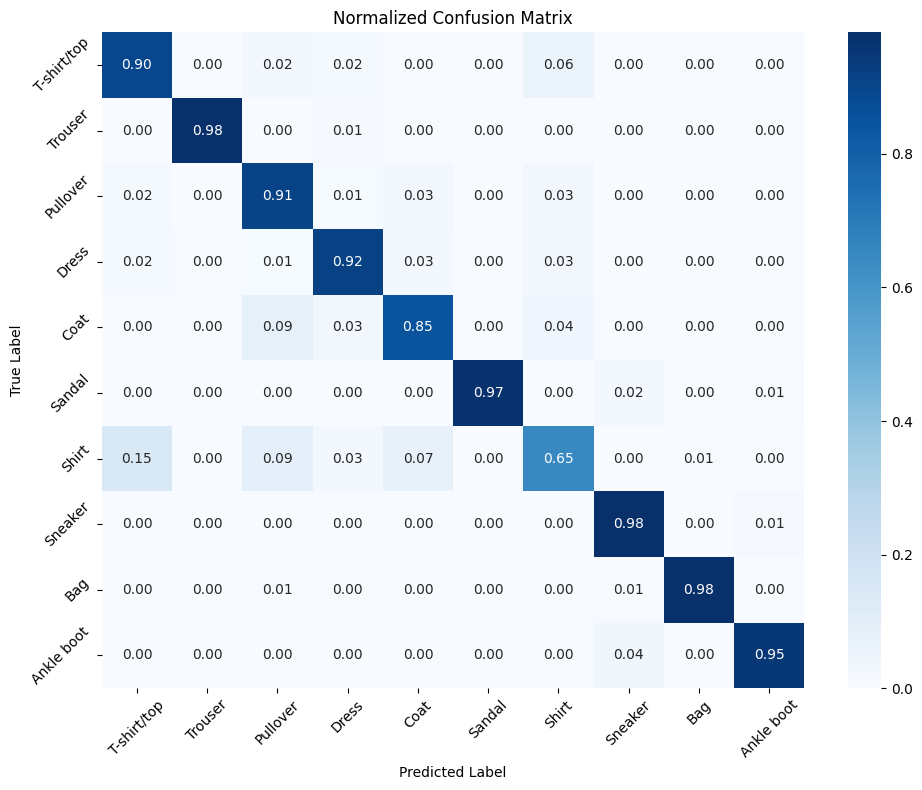

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
import seaborn as sns
from tqdm import tqdm
import random
import os

# ===========================
# Configuration and Settings
# ===========================

# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed()

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Hyperparameters and other configurations
config = {
    'batch_size': 1024,
    'learning_rate': 0.001,
    'num_epochs': 20,
    'validation_split': 0.2,
    'seed': 42,
    'num_workers': 4,  # Adjust based on your CPU
    'patience': 5,      # For Early Stopping
}

# ===========================
# Data Preparation and EDA
# ===========================

# Define transformations: Including data augmentation for training
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean=0.5, std=0.5
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the datasets
train_val_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)

test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)

# Split the dataset into training and validation sets
train_size = int((1 - config['validation_split']) * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size
train_set, val_set = random_split(
    train_val_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(config['seed'])
)

# Update transforms for validation (no augmentation)
val_set.dataset.transform = transform_test

# Define DataLoaders
train_loader = DataLoader(
    train_set,
    batch_size=config['batch_size'],
    shuffle=True,
    num_workers=config['num_workers'],
    pin_memory=True
)

val_loader = DataLoader(
    val_set,
    batch_size=config['batch_size'],
    shuffle=False,
    num_workers=config['num_workers'],
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=config['batch_size'],
    shuffle=False,
    num_workers=config['num_workers'],
    pin_memory=True
)

# EDA: Class labels
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Function to visualize sample images
def visualize_samples(dataset, n_samples=10, title="Sample Images"):
    fig, axes = plt.subplots(1, n_samples, figsize=(15, 2))
    for i in range(n_samples):
        idx = np.random.randint(0, len(dataset))
        image, label = dataset[idx]
        image = image.numpy().squeeze()  # Remove single channel
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(class_labels[label])
        axes[i].axis('off')
    plt.suptitle(title)
    plt.show()

print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_dataset)}")

print("Sample images from the training set:")
visualize_samples(train_set, n_samples=10, title="Training Set Samples")

# Function to plot class distribution
def plot_class_distribution(labels, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=labels, palette='viridis')
    plt.xticks(ticks=range(10), labels=class_labels, rotation=45)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Extract labels for plotting
train_labels = [train_val_dataset.targets[idx] for idx in train_set.indices]
val_labels = [train_val_dataset.targets[idx] for idx in val_set.indices]
test_labels = test_dataset.targets.numpy()

print("Class distribution in the training set:")
plot_class_distribution(train_labels, "Training Set Class Distribution")

print("Class distribution in the validation set:")
plot_class_distribution(val_labels, "Validation Set Class Distribution")

print("Class distribution in the test set:")
plot_class_distribution(test_labels, "Test Set Class Distribution")

# Check data ranges and shapes
def inspect_batch(loader):
    images, labels = next(iter(loader))
    print("Image tensor shape:", images.shape)
    print("Label tensor shape:", labels.shape)
    print("Image pixel range (normalized):", (images.min().item(), images.max().item()))

    # Additional statistics
    mean_pixel_value = images.mean().item()
    std_pixel_value = images.std().item()
    print(f"Mean pixel value (normalized): {mean_pixel_value:.4f}")
    print(f"Std pixel value (normalized): {std_pixel_value:.4f}")

print("Inspecting a batch from the training loader:")
inspect_batch(train_loader)

# Visualize grid of images
def visualize_grid(loader, n_images=25, title="Image Grid"):
    images, labels = next(iter(loader))
    images = images[:n_images]
    labels = labels[:n_images]
    grid_size = int(np.ceil(np.sqrt(n_images)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axes = axes.flatten()
    for i in range(n_images):
        image = images[i].cpu().numpy().squeeze()
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(class_labels[labels[i]])
        axes[i].axis('off')
    for i in range(n_images, len(axes)):
        axes[i].axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

print("Grid of sample images from the training set:")
visualize_grid(train_loader, n_images=25, title="Training Set Image Grid")

# Validate normalization
def validate_normalization(loader):
    images, _ = next(iter(loader))
    unnormalized_images = images * 0.5 + 0.5  # Undo normalization
    print("Unnormalized pixel range:", (unnormalized_images.min().item(), unnormalized_images.max().item()))
    return unnormalized_images

print("Validating normalization:")
validate_normalization(train_loader)

# Additional EDA: Average and Variability Images per Class
def compute_average_images(dataset, num_classes=10):
    averages = torch.zeros((num_classes, 28, 28))
    counts = torch.zeros(num_classes)
    for image, label in tqdm(dataset, desc="Computing average images"):
        averages[label] += image.squeeze()
        counts[label] += 1
    for i in range(num_classes):
        if counts[i] > 0:
            averages[i] /= counts[i]
    return averages

def compute_class_variability(dataset, averages, num_classes=10):
    variances = torch.zeros((num_classes, 28, 28))
    counts = torch.zeros(num_classes)
    for image, label in tqdm(dataset, desc="Computing class variability"):
        variances[label] += (image.squeeze() - averages[label]) ** 2
        counts[label] += 1
    for i in range(num_classes):
        if counts[i] > 0:
            variances[i] /= counts[i]
    return variances

def visualize_average_images(averages, class_labels, title="Average Images per Class"):
    fig, axes = plt.subplots(1, len(class_labels), figsize=(20, 2))
    for i, ax in enumerate(axes):
        ax.imshow(averages[i], cmap='gray')
        ax.set_title(class_labels[i])
        ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def visualize_variability_images(variances, class_labels, title="Variability Images per Class"):
    fig, axes = plt.subplots(1, len(class_labels), figsize=(20, 2))
    for i, ax in enumerate(axes):
        ax.imshow(variances[i], cmap='hot')
        ax.set_title(f"Var: {class_labels[i]}")
        ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

print("Computing average images per class in the training set:")
average_images = compute_average_images(train_set)
visualize_average_images(average_images, class_labels)

print("Computing variability images per class in the training set:")
class_variability = compute_class_variability(train_set, average_images)
visualize_variability_images(class_variability, class_labels)

# ===========================
# Model Definition
# ===========================

class FashionCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(FashionCNN, self).__init__()

        self.features = nn.Sequential(
            # First Convolutional Block
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Dropout(0.25),

            # Second Convolutional Block
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),

            # Third Convolutional Block
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),
        )

        self.classifier = nn.Sequential(
            nn.Linear(128 * 7 * 7, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),

            nn.Linear(128, num_classes)
        )

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        # Xavier initialization for Conv and Linear layers
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.classifier(x)
        return x

# Initialize the model, loss function, and optimizer
model = FashionCNN(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Early Stopping class
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0.0, path='checkpoint.pt'):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """Saves model when validation loss decreases."""
        if self.verbose:
            print(f'Validation loss decreased ({self.best_loss:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)

# Initialize Early Stopping
early_stopping = EarlyStopping(patience=config['patience'], verbose=True)

# ===========================
# Training and Validation
# ===========================

def train_validate(model, criterion, optimizer, scheduler, num_epochs, train_loader, val_loader, device, early_stopping):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    val_f1_scores = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        loop = tqdm(train_loader, desc='Training', leave=False)
        for images, labels in loop:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

            # Update progress bar
            loop.set_postfix(loss=loss.item())

        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(epoch_train_loss)
        train_accuracies.append(train_accuracy)

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        correct_val = 0
        total_val = 0
        all_labels = []
        all_preds = []

        with torch.no_grad():
            loop = tqdm(val_loader, desc='Validation', leave=False)
            for images, labels in loop:
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(predicted.cpu().numpy())

                # Update progress bar
                loop.set_postfix(loss=loss.item())

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        val_accuracy = 100 * correct_val / total_val
        val_f1 = f1_score(all_labels, all_preds, average='weighted')
        val_losses.append(epoch_val_loss)
        val_accuracies.append(val_accuracy)
        val_f1_scores.append(val_f1)

        print(f'Training Loss: {epoch_train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%')
        print(f'Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%, F1 Score: {val_f1:.4f}')

        # Step the scheduler
        scheduler.step()

        # Early Stopping check
        early_stopping(epoch_val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered. Stopping training.")
            break

    # Load the best model
    model.load_state_dict(torch.load(early_stopping.path))

    history = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'val_f1_scores': val_f1_scores
    }

    return history

# Start training
history = train_validate(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=config['num_epochs'],
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    early_stopping=early_stopping
)

# ===========================
# Plotting Training History
# ===========================

def plot_training_history(history, num_epochs):
    epochs = range(1, len(history['train_losses']) + 1)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

    # Loss plot
    ax1.plot(epochs, history['train_losses'], label='Training Loss')
    ax1.plot(epochs, history['val_losses'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True)

    # Accuracy plot
    ax2.plot(epochs, history['train_accuracies'], label='Training Accuracy')
    ax2.plot(epochs, history['val_accuracies'], label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    ax2.grid(True)

    # F1 Score plot
    ax3.plot(epochs, history['val_f1_scores'], label='Validation F1 Score', color='green')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('F1 Score')
    ax3.set_title('Validation F1 Score')
    ax3.legend()
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history, config['num_epochs'])

# ===========================
# Model Evaluation on Test Data
# ===========================

def evaluate_model(model, loader, device, class_labels):
    model.eval()
    test_correct = 0
    test_total = 0
    test_labels_list = []
    test_predictions_list = []

    with torch.no_grad():
        loop = tqdm(loader, desc='Testing', leave=False)
        for images, labels in loop:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            test_correct += (predicted == labels).sum().item()
            test_total += labels.size(0)

            test_labels_list.extend(labels.cpu().numpy())
            test_predictions_list.extend(predicted.cpu().numpy())

    test_accuracy = 100 * test_correct / test_total
    f1 = f1_score(test_labels_list, test_predictions_list, average='weighted')
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Test F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(test_labels_list, test_predictions_list)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return test_accuracy, f1, cm

test_accuracy, test_f1, cm = evaluate_model(model, test_loader, device, class_labels)

# ===========================
# Save the Final Model
# ===========================

def save_model(model, path='fashion_cnn.pth'):
    torch.save(model.state_dict(), path)
    print(f"Model saved to {path}")

save_model(model)

# ===========================
# Additional Visualizations (Optional)
# ===========================

# Plot normalized confusion matrix
def plot_normalized_confusion_matrix(cm, class_labels):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Normalized Confusion Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_normalized_confusion_matrix(cm, class_labels)


100%|██████████| 26.4M/26.4M [00:02<00:00, 10.5MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 166kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.12MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.34MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Training set size: 48000
Validation set size: 12000
Test set size: 10000
Sample images from the training set:


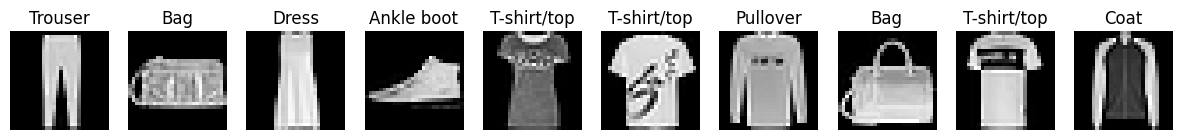

Class distribution in the training set:


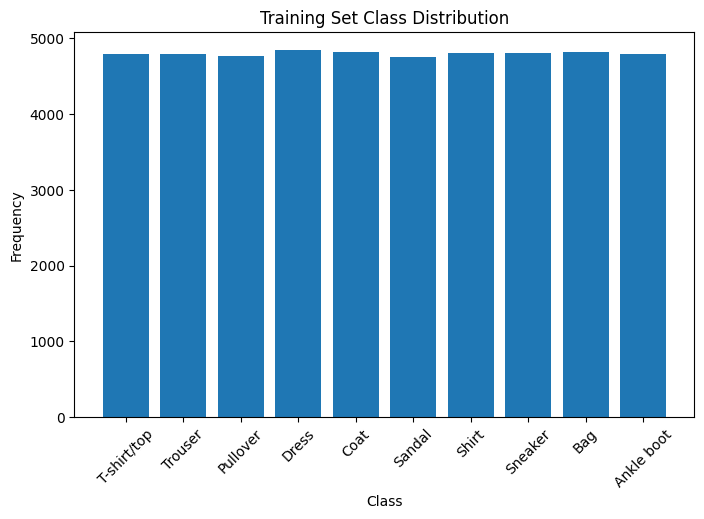

Class distribution in the validation set:


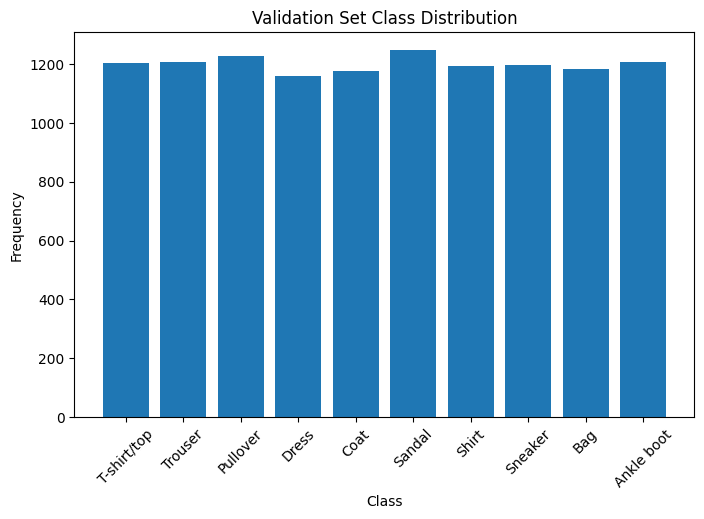

Image tensor shape: torch.Size([1024, 1, 28, 28])
Label tensor shape: torch.Size([1024])
Image pixel range: (-1.0, 1.0)
Mean pixel value (normalized): -0.4305
Std pixel value (normalized): 0.7038
Grid of sample images from the training set:


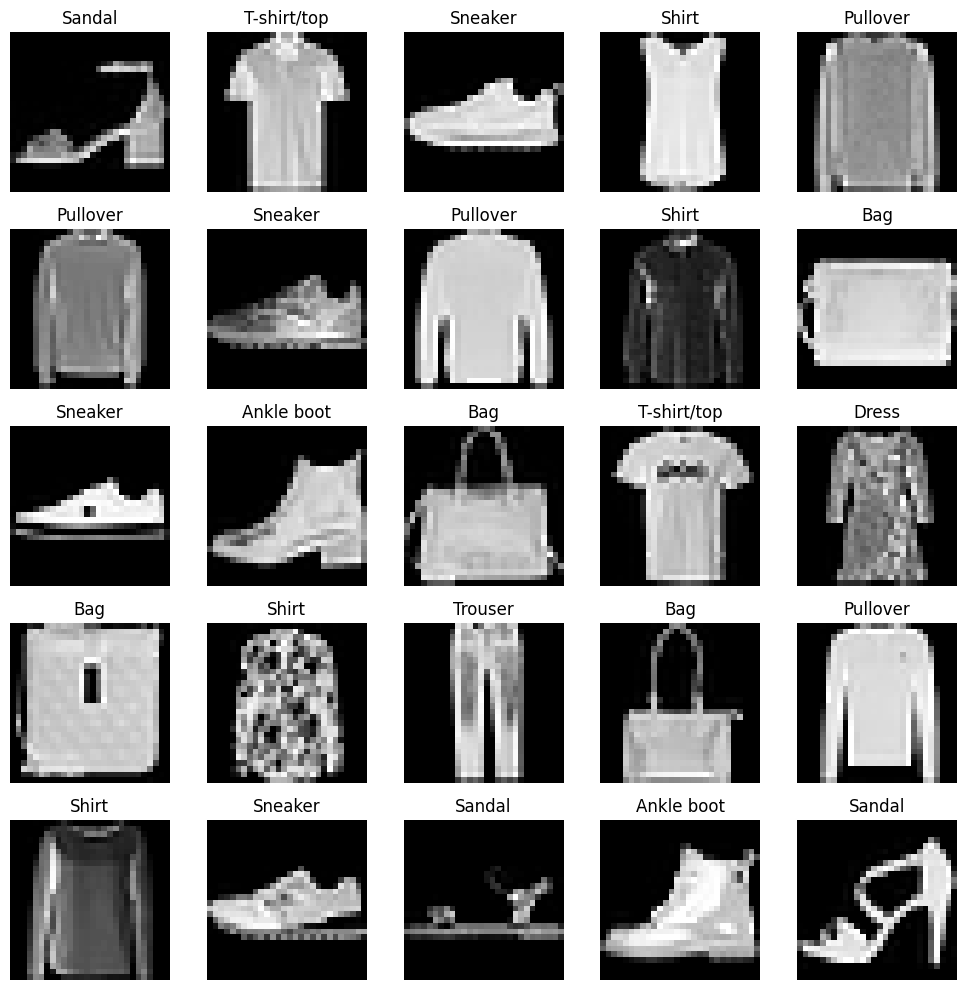

Unnormalized pixel range: (0.0, 1.0)


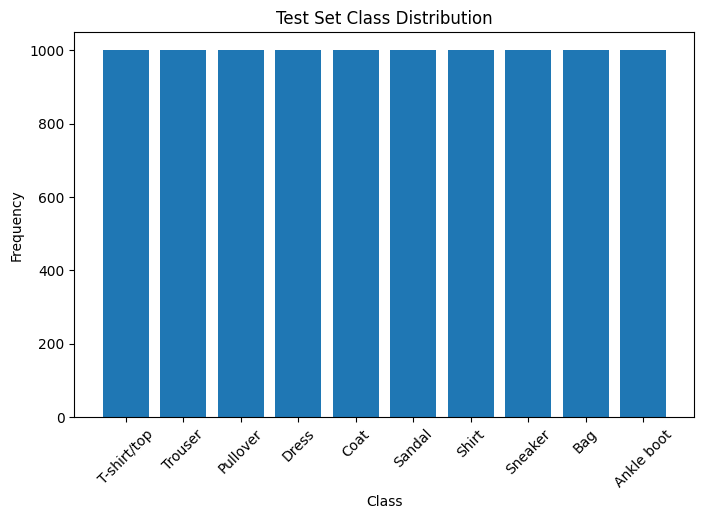

Average images per class in the training set:


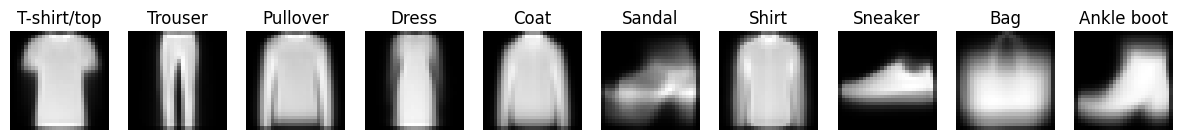

Variability images per class in the training set:


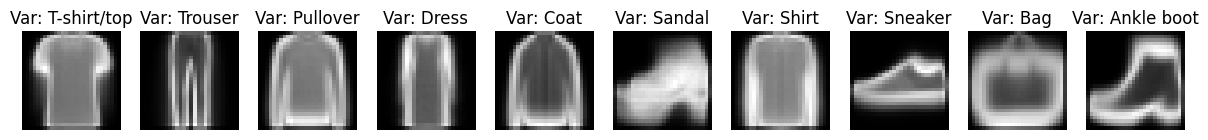

Epoch [1/10], Training Loss: 1.1056, Training Accuracy: 76.59%, Validation Loss: 1.0323, Validation Accuracy: 86.24%
Epoch [2/10], Training Loss: 0.6942, Training Accuracy: 88.92%, Validation Loss: 0.6361, Validation Accuracy: 90.05%
Epoch [3/10], Training Loss: 0.5200, Training Accuracy: 91.34%, Validation Loss: 0.5107, Validation Accuracy: 89.98%
Epoch [4/10], Training Loss: 0.4084, Training Accuracy: 92.56%, Validation Loss: 0.4106, Validation Accuracy: 90.72%
Epoch [5/10], Training Loss: 0.3264, Training Accuracy: 94.01%, Validation Loss: 0.3560, Validation Accuracy: 91.44%
Epoch [6/10], Training Loss: 0.2694, Training Accuracy: 94.82%, Validation Loss: 0.3436, Validation Accuracy: 91.58%
Epoch [7/10], Training Loss: 0.2246, Training Accuracy: 95.59%, Validation Loss: 0.2949, Validation Accuracy: 92.00%
Epoch [8/10], Training Loss: 0.1893, Training Accuracy: 96.40%, Validation Loss: 0.3191, Validation Accuracy: 91.29%
Epoch [9/10], Training Loss: 0.1568, Training Accuracy: 97.11%, 

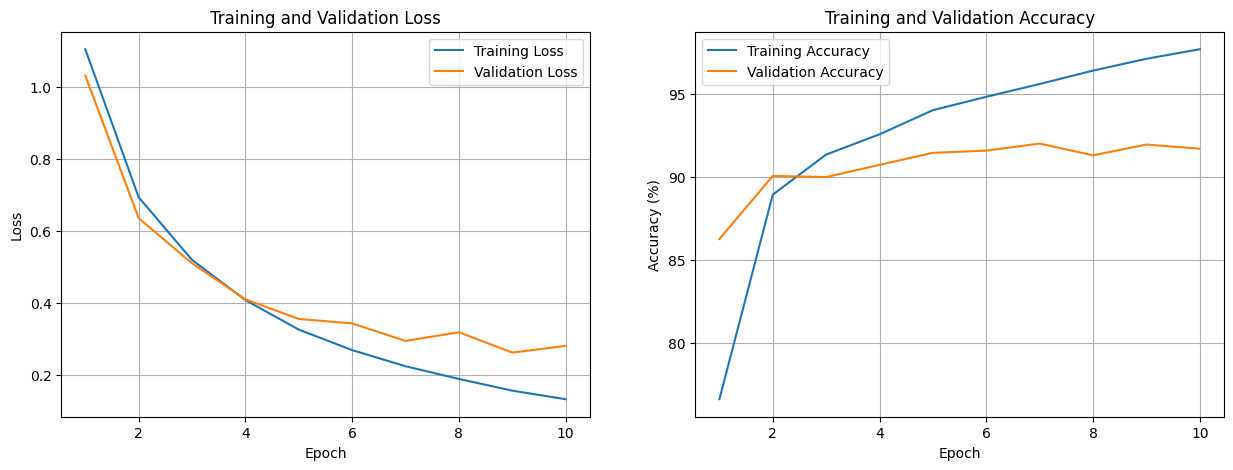

Test Accuracy: 91.24%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
import seaborn as sns

# Define transformations: Convert images to tensors and normalize them
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean=0.5, std=0.5
])

# Download and load the training and test datasets
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Split the training dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))  # 80% for training
val_size = len(train_dataset) - train_size  # 20% for validation
train_set, val_set = random_split(train_dataset, [train_size, val_size])

# Define DataLoaders with batch size 1024
batch_size = 1024

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# EDA: Inspect dataset structure
print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_dataset)}")

# Class labels in FashionMNIST
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Function to visualize images
def visualize_samples(dataset, n_samples=10):
    fig, axes = plt.subplots(1, n_samples, figsize=(15, 2))
    for i in range(n_samples):
        idx = np.random.randint(0, len(dataset))
        image, label = dataset[idx]
        image = image.numpy().squeeze()  # Remove single channel
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(class_labels[label])
        axes[i].axis('off')
    plt.show()

print("Sample images from the training set:")
visualize_samples(train_set, n_samples=10)

# Class distribution in the training set
train_labels = [train_dataset.targets[idx] for idx in train_set.indices]
val_labels = [train_dataset.targets[idx] for idx in val_set.indices]

def plot_class_distribution(labels, title):
    plt.figure(figsize=(8, 5))
    plt.hist(labels, bins=np.arange(11) - 0.5, rwidth=0.8, align='mid')
    plt.xticks(range(10), class_labels, rotation=45)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

print("Class distribution in the training set:")
plot_class_distribution(train_labels, "Training Set Class Distribution")

print("Class distribution in the validation set:")
plot_class_distribution(val_labels, "Validation Set Class Distribution")

# Check data ranges and shapes
batch = next(iter(train_loader))
images, labels = batch
print("Image tensor shape:", images.shape)
print("Label tensor shape:", labels.shape)
print("Image pixel range:", (images.min().item(), images.max().item()))

# Additional EDA: Image statistics
mean_pixel_value = images.mean().item()
std_pixel_value = images.std().item()
print(f"Mean pixel value (normalized): {mean_pixel_value:.4f}")
print(f"Std pixel value (normalized): {std_pixel_value:.4f}")

# Additional visualization: Grid of images
def visualize_grid(loader, n_images=25):
    images, labels = next(iter(loader))
    images = images[:n_images]
    labels = labels[:n_images]
    grid_size = int(np.ceil(np.sqrt(n_images)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axes = axes.flatten()
    for i in range(n_images):
        image = images[i].numpy().squeeze()
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(class_labels[labels[i]])
        axes[i].axis('off')
    for i in range(n_images, len(axes)):
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

print("Grid of sample images from the training set:")
visualize_grid(train_loader, n_images=25)

# Additional Analysis: Validate normalization
unnormalized_images = images * 0.5 + 0.5  # Undo normalization
print("Unnormalized pixel range:", (unnormalized_images.min().item(), unnormalized_images.max().item()))

# Additional Analysis: Label counts in test set
test_labels = test_dataset.targets.numpy()
plot_class_distribution(test_labels, "Test Set Class Distribution")

# Additional EDA: Average image per class
def compute_average_images(dataset, num_classes=10):
    averages = torch.zeros((num_classes, 28, 28))
    counts = torch.zeros(num_classes)
    for image, label in dataset:
        averages[label] += image.squeeze()
        counts[label] += 1
    for i in range(num_classes):
        if counts[i] > 0:
            averages[i] /= counts[i]
    return averages

average_images = compute_average_images(train_set)

# Visualize average images per class
def visualize_average_images(averages, class_labels):
    fig, axes = plt.subplots(1, len(class_labels), figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(averages[i], cmap='gray')
        ax.set_title(class_labels[i])
        ax.axis('off')
    plt.show()

print("Average images per class in the training set:")
visualize_average_images(average_images, class_labels)

# Additional EDA: Variability per class
def compute_class_variability(dataset, num_classes=10):
    variances = torch.zeros((num_classes, 28, 28))
    counts = torch.zeros(num_classes)
    averages = compute_average_images(dataset, num_classes)
    for image, label in dataset:
        variances[label] += (image.squeeze() - averages[label]) ** 2
        counts[label] += 1
    for i in range(num_classes):
        if counts[i] > 0:
            variances[i] /= counts[i]
    return variances

class_variability = compute_class_variability(train_set)

# Visualize variability images per class
def visualize_variability_images(variances, class_labels):
    fig, axes = plt.subplots(1, len(class_labels), figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(variances[i], cmap='gray')
        ax.set_title(f"Var: {class_labels[i]}")
        ax.axis('off')
    plt.show()

print("Variability images per class in the training set:")
visualize_variability_images(class_variability, class_labels)

# Define the CNN model
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()  # Using ReLU for convolutional layers

        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()

        self.pool = nn.MaxPool2d(2, 2)  # Reduce spatial dimensions

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 14 * 14, 128)  # Assuming input images are 28x28
        self.bn3 = nn.BatchNorm1d(128)
        self.sigmoid1 = nn.Sigmoid()

        self.fc2 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.sigmoid2 = nn.Sigmoid()

        self.fc3 = nn.Linear(64, 10)  # 10 classes for Fashion-MNIST

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        # Apply Xavier initialization to convolutional and linear layers
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        # Convolutional layers with ReLU and BatchNorm
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)

        x = self.pool(x)

        # Flatten the output for fully connected layers
        x = x.view(-1, 64 * 14 * 14)

        # Fully connected layers with BatchNorm and Sigmoid
        x = self.fc1(x)
        x = self.bn3(x)
        x = self.sigmoid1(x)

        x = self.fc2(x)
        x = self.bn4(x)
        x = self.sigmoid2(x)

        # Output layer (no activation)
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = FashionCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Validation Loop
num_epochs = 10

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_accuracy = 100 * correct_train / total_train  # Accuracy in percentage
    train_losses.append(epoch_train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    epoch_val_loss = val_running_loss / len(val_loader.dataset)
    val_accuracy = 100 * correct_val / total_val  # Accuracy in percentage
    val_losses.append(epoch_val_loss)
    val_accuracies.append(val_accuracy)

    # Print loss and accuracy for this epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Training Loss: {epoch_train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, "
          f"Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Plot loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Loss plot
ax1.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
ax1.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True)

# Accuracy plot
ax2.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
ax2.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()
ax2.grid(True)

plt.show()

# Model Evaluation on Test Data
model.eval()
test_correct = 0
test_total = 0
test_labels_list = []
test_predictions_list = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

        test_labels_list.extend(labels.cpu().numpy())
        test_predictions_list.extend(predicted.cpu().numpy())

test_accuracy = 100 * test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.2f}%")



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
# Define transformations: Convert images to tensors and normalize them
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean=0.5, std=0.5
])

# Download and load the training and test datasets
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Split the training dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))  # 80% for training
val_size = len(train_dataset) - train_size  # 20% for validation
train_set, val_set = random_split(train_dataset, [train_size, val_size])

# Define DataLoaders with batch size 1024
batch_size = 1024

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.90MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.86MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.19MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Training set size: 48000
Validation set size: 12000
Test set size: 10000
Sample images from the training set:


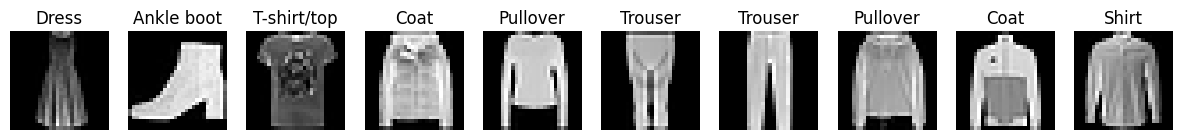

Class distribution in the training set:


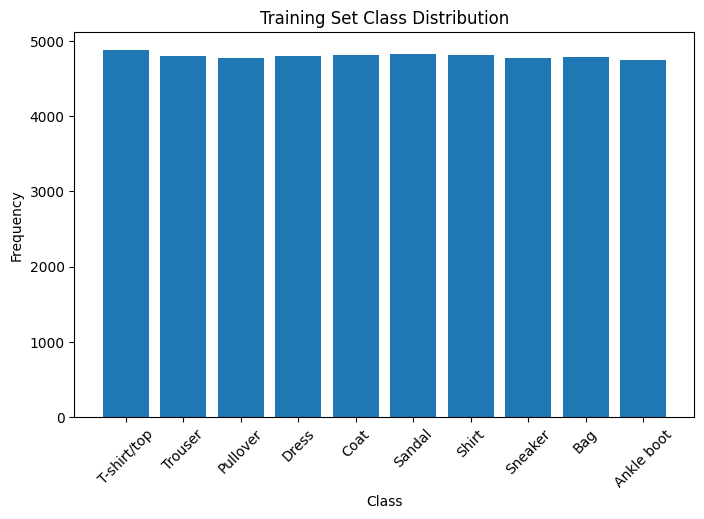

Class distribution in the validation set:


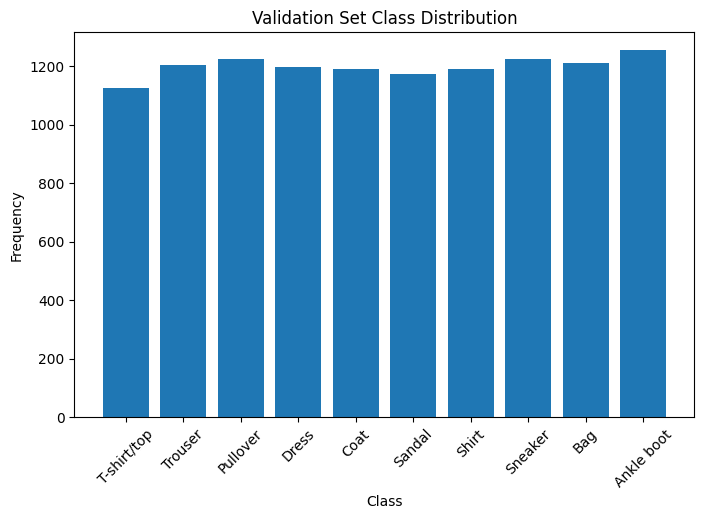

Image tensor shape: torch.Size([1024, 1, 28, 28])
Label tensor shape: torch.Size([1024])
Image pixel range: (-1.0, 1.0)


In [ ]:
# EDA: Inspect dataset structure
print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_dataset)}")

# Class labels in FashionMNIST
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Function to visualize images
def visualize_samples(dataset, n_samples=10):
    fig, axes = plt.subplots(1, n_samples, figsize=(15, 2))
    for i in range(n_samples):
        idx = np.random.randint(0, len(dataset))
        image, label = dataset[idx]
        image = image.numpy().squeeze()  # Remove single channel
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(class_labels[label])
        axes[i].axis('off')
    plt.show()

print("Sample images from the training set:")
visualize_samples(train_set, n_samples=10)

# Class distribution in the training set
train_labels = [train_dataset.targets[idx] for idx in train_set.indices]
val_labels = [train_dataset.targets[idx] for idx in val_set.indices]

def plot_class_distribution(labels, title):
    plt.figure(figsize=(8, 5))
    plt.hist(labels, bins=np.arange(11) - 0.5, rwidth=0.8, align='mid')
    plt.xticks(range(10), class_labels, rotation=45)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

print("Class distribution in the training set:")
plot_class_distribution(train_labels, "Training Set Class Distribution")

print("Class distribution in the validation set:")
plot_class_distribution(val_labels, "Validation Set Class Distribution")

# Check data ranges and shapes
batch = next(iter(train_loader))
images, labels = batch
print("Image tensor shape:", images.shape)
print("Label tensor shape:", labels.shape)
print("Image pixel range:", (images.min().item(), images.max().item()))

Mean pixel value (normalized): -0.4283
Std pixel value (normalized): 0.7046
Grid of sample images from the training set:


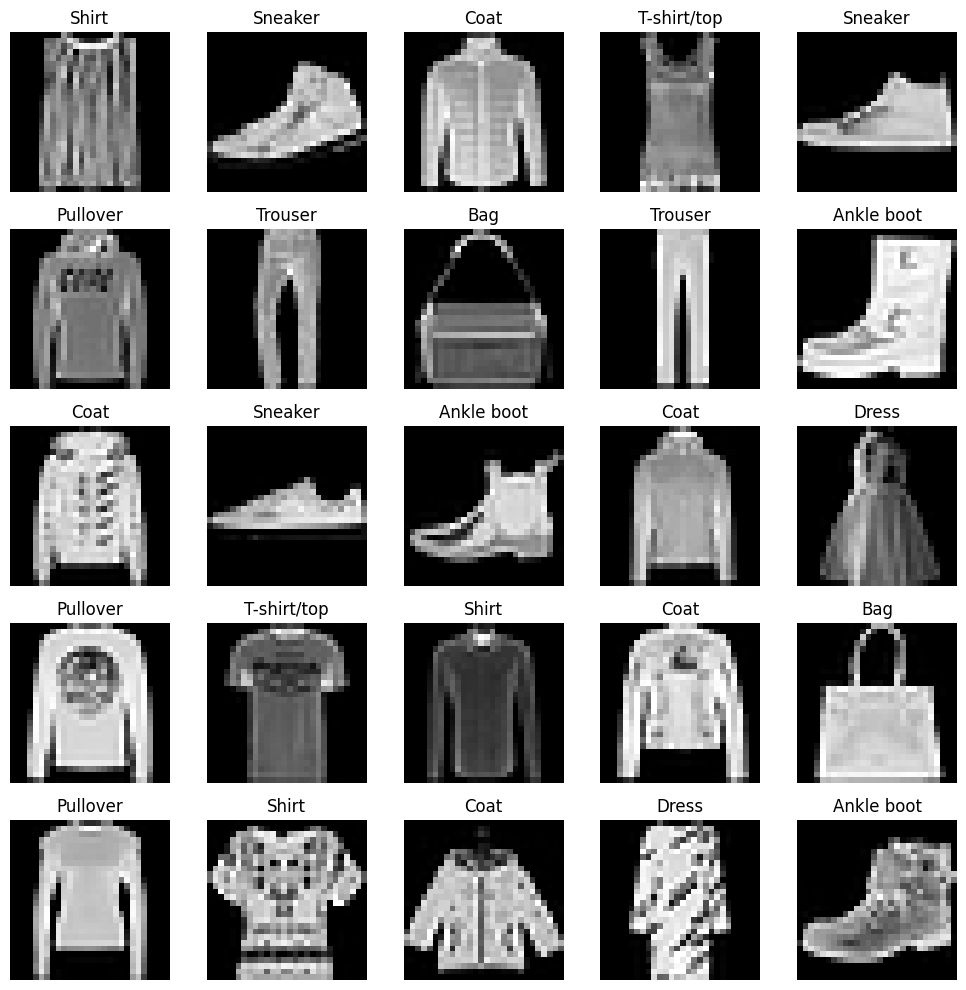

Unnormalized pixel range: (0.0, 1.0)


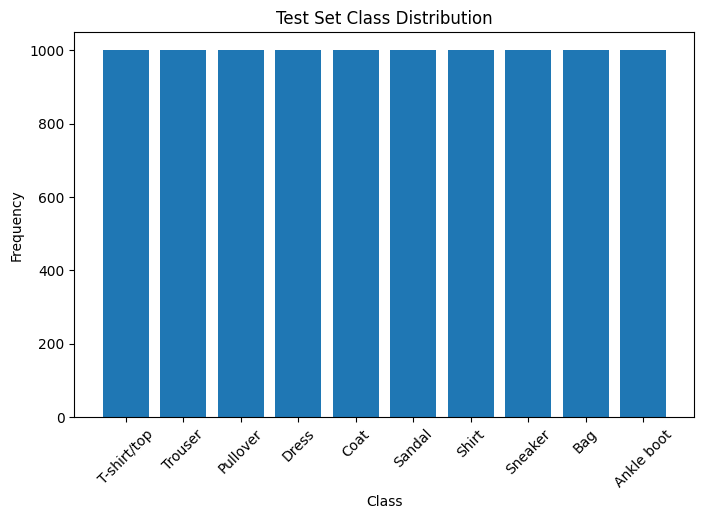

In [ ]:
# Additional EDA: Image statistics
mean_pixel_value = images.mean().item()
std_pixel_value = images.std().item()
print(f"Mean pixel value (normalized): {mean_pixel_value:.4f}")
print(f"Std pixel value (normalized): {std_pixel_value:.4f}")

# Additional visualization: Grid of images
def visualize_grid(loader, n_images=25):
    images, labels = next(iter(loader))
    images = images[:n_images]
    labels = labels[:n_images]
    grid_size = int(np.ceil(np.sqrt(n_images)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axes = axes.flatten()
    for i in range(n_images):
        image = images[i].numpy().squeeze()
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(class_labels[labels[i]])
        axes[i].axis('off')
    for i in range(n_images, len(axes)):
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

print("Grid of sample images from the training set:")
visualize_grid(train_loader, n_images=25)

# Additional Analysis: Validate normalization
unnormalized_images = images * 0.5 + 0.5  # Undo normalization
print("Unnormalized pixel range:", (unnormalized_images.min().item(), unnormalized_images.max().item()))

# Additional Analysis: Label counts in test set
test_labels = test_dataset.targets.numpy()
plot_class_distribution(test_labels, "Test Set Class Distribution")

Average images per class in the training set:


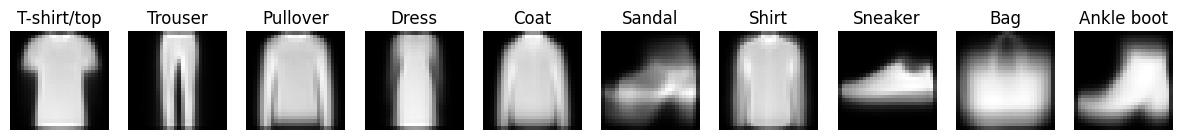

Variability images per class in the training set:


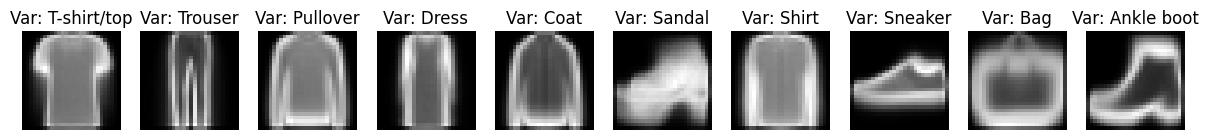

In [ ]:
# Additional EDA: Average image per class
def compute_average_images(dataset, num_classes=10):
    averages = torch.zeros((num_classes, 28, 28))
    counts = torch.zeros(num_classes)
    for image, label in dataset:
        averages[label] += image.squeeze()
        counts[label] += 1
    for i in range(num_classes):
        if counts[i] > 0:
            averages[i] /= counts[i]
    return averages

average_images = compute_average_images(train_set)

# Visualize average images per class
def visualize_average_images(averages, class_labels):
    fig, axes = plt.subplots(1, len(class_labels), figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(averages[i], cmap='gray')
        ax.set_title(class_labels[i])
        ax.axis('off')
    plt.show()

print("Average images per class in the training set:")
visualize_average_images(average_images, class_labels)

# Additional EDA: Variability per class
def compute_class_variability(dataset, num_classes=10):
    variances = torch.zeros((num_classes, 28, 28))
    counts = torch.zeros(num_classes)
    averages = compute_average_images(dataset, num_classes)
    for image, label in dataset:
        variances[label] += (image.squeeze() - averages[label]) ** 2
        counts[label] += 1
    for i in range(num_classes):
        if counts[i] > 0:
            variances[i] /= counts[i]
    return variances

class_variability = compute_class_variability(train_set)

# Visualize variability images per class
def visualize_variability_images(variances, class_labels):
    fig, axes = plt.subplots(1, len(class_labels), figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(variances[i], cmap='gray')
        ax.set_title(f"Var: {class_labels[i]}")
        ax.axis('off')
    plt.show()

print("Variability images per class in the training set:")
visualize_variability_images(class_variability, class_labels)


In [ ]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()  # Using ReLU for convolutional layers

        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()

        self.pool = nn.MaxPool2d(2, 2)  # Reduce spatial dimensions

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 14 * 14, 128)  # Assuming input images are 28x28
        self.bn3 = nn.BatchNorm1d(128)
        self.sigmoid1 = nn.Sigmoid()

        self.fc2 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.sigmoid2 = nn.Sigmoid()

        self.fc3 = nn.Linear(64, 10)  # 10 classes for Fashion-MNIST

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        # Apply Xavier initialization to convolutional and linear layers
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        # Convolutional layers with ReLU and BatchNorm
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)

        x = self.pool(x)

        # Flatten the tensor for fully connected layers
        x = x.view(x.size(0), -1)

        # Fully connected layers with BatchNorm and Sigmoid
        x = self.fc1(x)
        x = self.bn3(x)
        x = self.sigmoid1(x)

        x = self.fc2(x)
        x = self.bn4(x)
        x = self.sigmoid2(x)

        x = self.fc3(x)  # Output layer (logits)

        return x

In [ ]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Instantiate the model and move it to the device
model = FashionCNN().to(device)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer with learning rate 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)

Using device: cuda


In [ ]:
num_epochs = 20  # You can adjust the number of epochs

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)

    epoch_val_loss = val_running_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_train_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}")

Epoch [1/20], Training Loss: 1.0713, Validation Loss: 1.0211
Epoch [2/20], Training Loss: 0.6754, Validation Loss: 0.6048
Epoch [3/20], Training Loss: 0.5048, Validation Loss: 0.4819
Epoch [4/20], Training Loss: 0.3926, Validation Loss: 0.3865
Epoch [5/20], Training Loss: 0.3161, Validation Loss: 0.3680
Epoch [6/20], Training Loss: 0.2602, Validation Loss: 0.3327
Epoch [7/20], Training Loss: 0.2181, Validation Loss: 0.3036
Epoch [8/20], Training Loss: 0.1822, Validation Loss: 0.2725
Epoch [9/20], Training Loss: 0.1555, Validation Loss: 0.2792
Epoch [10/20], Training Loss: 0.1279, Validation Loss: 0.2707
Epoch [11/20], Training Loss: 0.1129, Validation Loss: 0.2695
Epoch [12/20], Training Loss: 0.0943, Validation Loss: 0.2842
Epoch [13/20], Training Loss: 0.0812, Validation Loss: 0.2674
Epoch [14/20], Training Loss: 0.0679, Validation Loss: 0.2950
Epoch [15/20], Training Loss: 0.0595, Validation Loss: 0.2594
Epoch [16/20], Training Loss: 0.0505, Validation Loss: 0.2723
Epoch [17/20], Tr

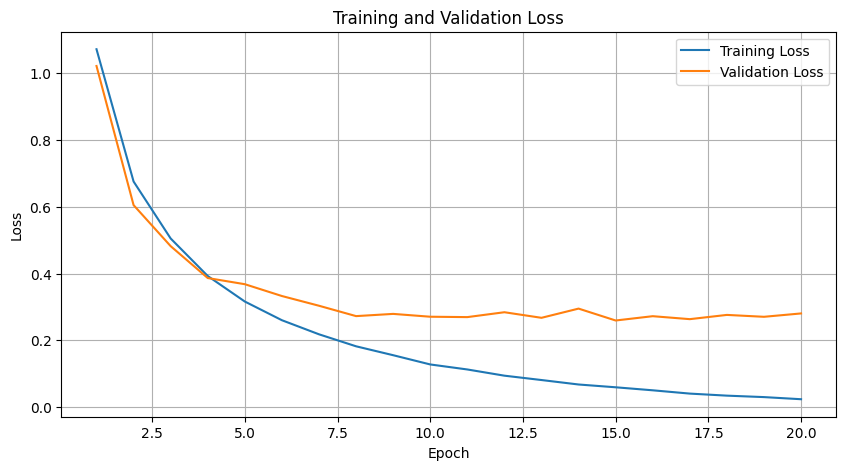

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()